In [40]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from zipfile import ZipFile
file_name = '/content/Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [41]:
#looping on Train folder to get image and turn it to an array 
img_Train = np.ones([2400, 785])
for i in range(2400): 
  path = '/content/Data/Train/' + str(i+1) + ".jpg"
  img = Image.open(path)
  image = np.append(np.asarray(img), [1])
  img_Train[i] =  image

#looping on Test folder to get image and turn it to an array
img_test = np.ones([200, 785])
for i in range(200):
  path = '/content/Data/Test/' + str(i+1) + ".jpg"
  img = Image.open(path)
  image = np.append(np.asarray(img), [1])
  img_test[i] =  image

In [42]:
X = img_Train
xTranspose = X.transpose()
m1 = np.dot(xTranspose, X)
m2 = np.dot(np.linalg.pinv(m1), xTranspose)

result = np.ones([200])
for i in range(200):
  n = 0
  prediction = np.zeros([1])
  diffrence = np.zeros([10])
  for j in range(10):
    t = np.ones([2400]) * -1
    for x in range (240):
      t[(n * 240)+x] *= -1
    W = np.dot(m2, t)
    n += 1
    prediction[0] = np.dot(W, img_test[i])
    diffrence[j] = (np.subtract(prediction[0], 1)) * (np.subtract(prediction[0], 1))

  minimum = np.amin(diffrence) 
  result[i] = np.where(diffrence == minimum)[0][0]

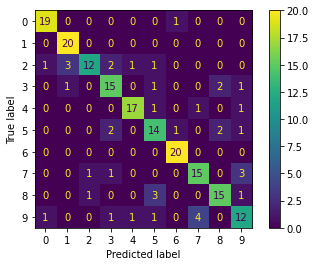

In [44]:
test_Labels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
ConfusionMatrixDisplay(confusion_matrix(test_Labels, result)).plot()